In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Анализ таблицы с пользователями

In [3]:
users = pd.read_csv("../../data/raw_data/customers.csv")
users.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
def check_missing_data(all_data):
  missing_data = {}
  for key in all_data.columns:
      if all_data[key].isnull().sum() > 0:
          missing_data[key] = (all_data[key].isnull().sum()  /  len(all_data[key])) * 100
  return missing_data

In [5]:
missing_data = check_missing_data(users)
missing_data = pd.DataFrame(missing_data, index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)
missing_data

,MissingValues
Active,66.150819
FN,65.237831
fashion_news_frequency,1.166854
age,1.156066
club_member_status,0.441843


In [6]:
users.Active.unique()

array([nan,  1.])

In [7]:
users.FN.unique()

array([nan,  1.])

In [8]:
users.Active = users.Active.fillna(0)
users.FN = users.FN.fillna(0)
users.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


/var/folders/kt/djps_cgs2dbdjb8178k9bkgh0000gn/T/ipykernel_12746/1884224574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(users.corr(), annot=True, cmap='Greens')


<AxesSubplot: >

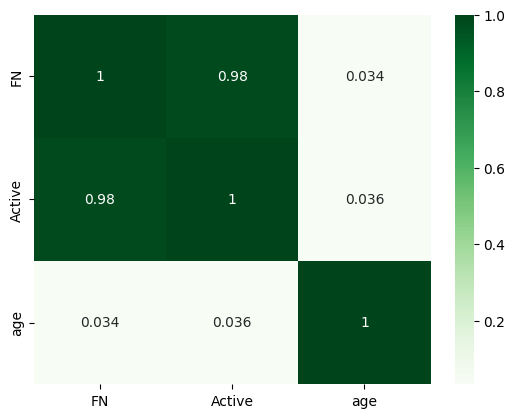

In [9]:
sns.heatmap(users.corr(), annot=True, cmap='Greens')

In [10]:
users.drop(columns=["FN"], inplace=True)
users.head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


<AxesSubplot: xlabel='age', ylabel='Count'>

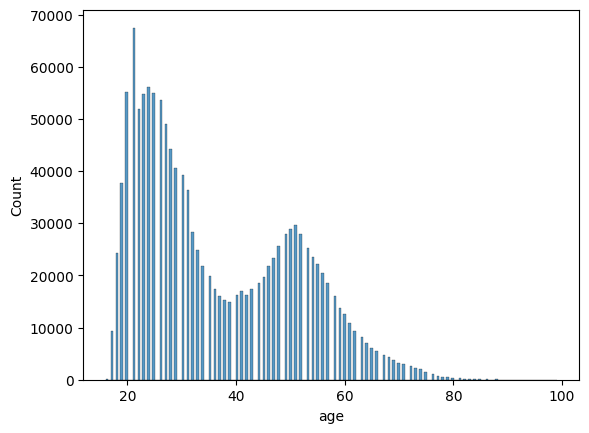

In [11]:
sns.histplot(users.age)

In [12]:
print("mean    ", users.age.mode()[0])
users.age.describe()

mean     21.0


count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [13]:
users.age = users.age.fillna(users.age.mean())

In [14]:
dct = {}
for i in range(16, 20):
    dct[i] = 0
for i in range(20, 40):
    dct[i] = 1
for i in range(40, 61):
    dct[i] = 2
for i in range(61, 100):
    dct[i] = 3

users['age_group'] = users.age.apply(lambda x : dct[int(x)])
users.head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,2


<AxesSubplot: xlabel='age_group', ylabel='Count'>

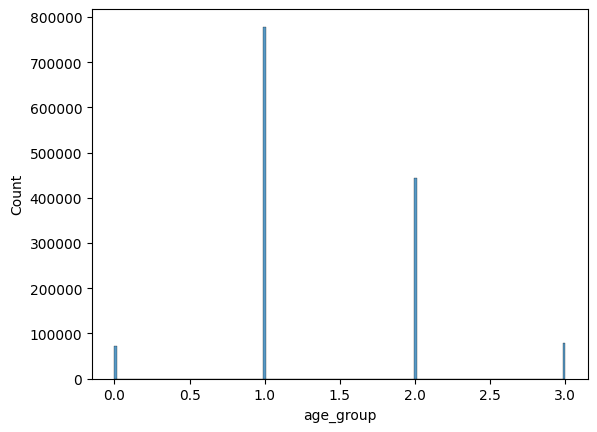

In [15]:
sns.histplot(users.age_group)

<AxesSubplot: xlabel='club_member_status', ylabel='Count'>

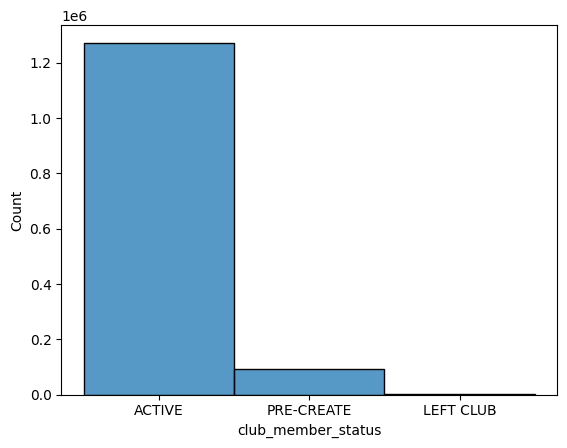

In [16]:
sns.histplot(users.club_member_status)

In [17]:
users.club_member_status = users.club_member_status.fillna("PRE-CREATE")

<AxesSubplot: xlabel='fashion_news_frequency', ylabel='Count'>

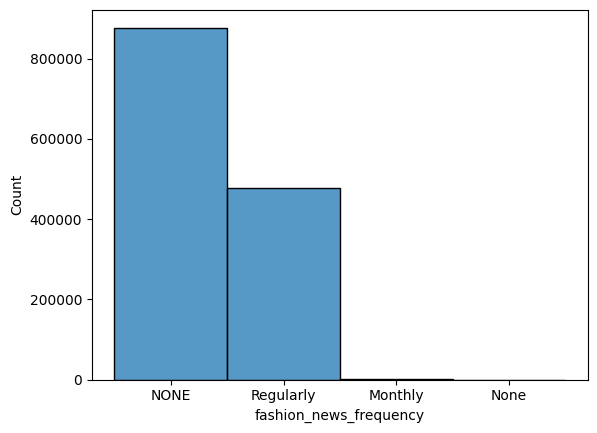

In [18]:
sns.histplot(users.fashion_news_frequency)

In [19]:
users.fashion_news_frequency = users.fashion_news_frequency.fillna("NONE")

In [20]:
users.fashion_news_frequency = users.fashion_news_frequency.apply(lambda x : x if x != "None" else "NONE")

## Анализ таблицы с объектами

In [21]:
items = pd.read_csv("../../raw_data/data/articles.csv")
items.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [22]:
missing_data = check_missing_data(items)
missing_data = pd.DataFrame(missing_data, index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)
missing_data

,MissingValues
detail_desc,0.394156


In [23]:
items.detail_desc = items.detail_desc.fillna("")

/var/folders/kt/djps_cgs2dbdjb8178k9bkgh0000gn/T/ipykernel_12746/2853880634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(items.corr(), annot=True, cmap='Greens')


<AxesSubplot: >

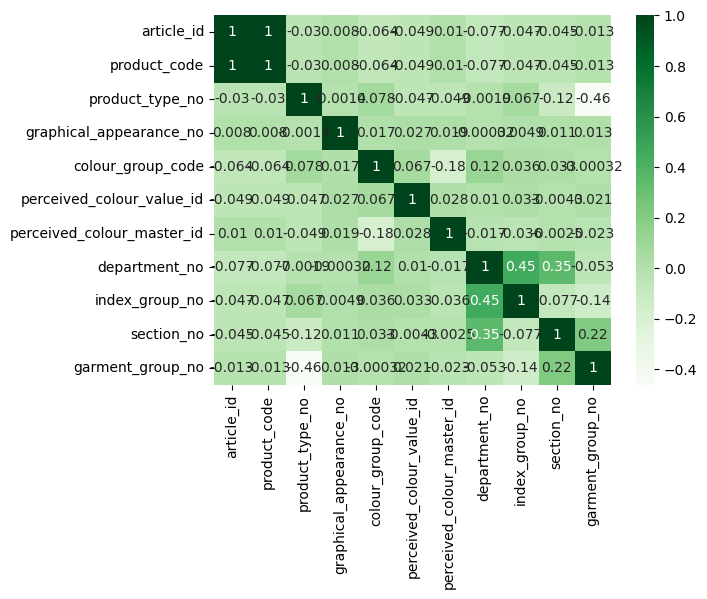

In [24]:
sns.heatmap(items.corr(), annot=True, cmap='Greens')

In [25]:
items.product_type_name.value_counts().head(10)

Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Blouse       3979
Jacket       3940
Shorts       3939
Shirt        3405
Vest top     2991
Name: product_type_name, dtype: int64

In [26]:
items.product_type_name.value_counts().tail(12)

Bumbag           1
Pre-walkers      1
Bra extender     1
Wood balls       1
Towel            1
Sewing kit       1
Washing bag      1
Keychain         1
Headband         1
Cushion          1
Blanket          1
Clothing mist    1
Name: product_type_name, dtype: int64

In [27]:
items.product_group_name.value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

<AxesSubplot: xlabel='index_group_name', ylabel='Count'>

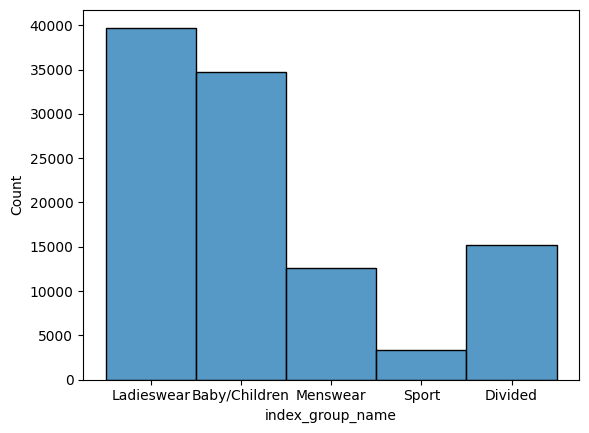

In [28]:
sns.histplot(items.index_group_name)

## Анализ таблицы с транзакциями

In [29]:
transactions = pd.read_csv("../../data/raw_data/transactions_train.csv")
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


<AxesSubplot: xlabel='sales_channel_id', ylabel='Count'>

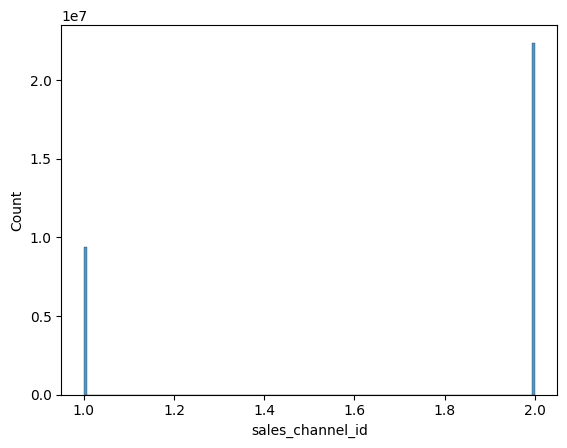

In [30]:
sns.histplot(transactions.sales_channel_id)

<AxesSubplot: xlabel='t_dat'>

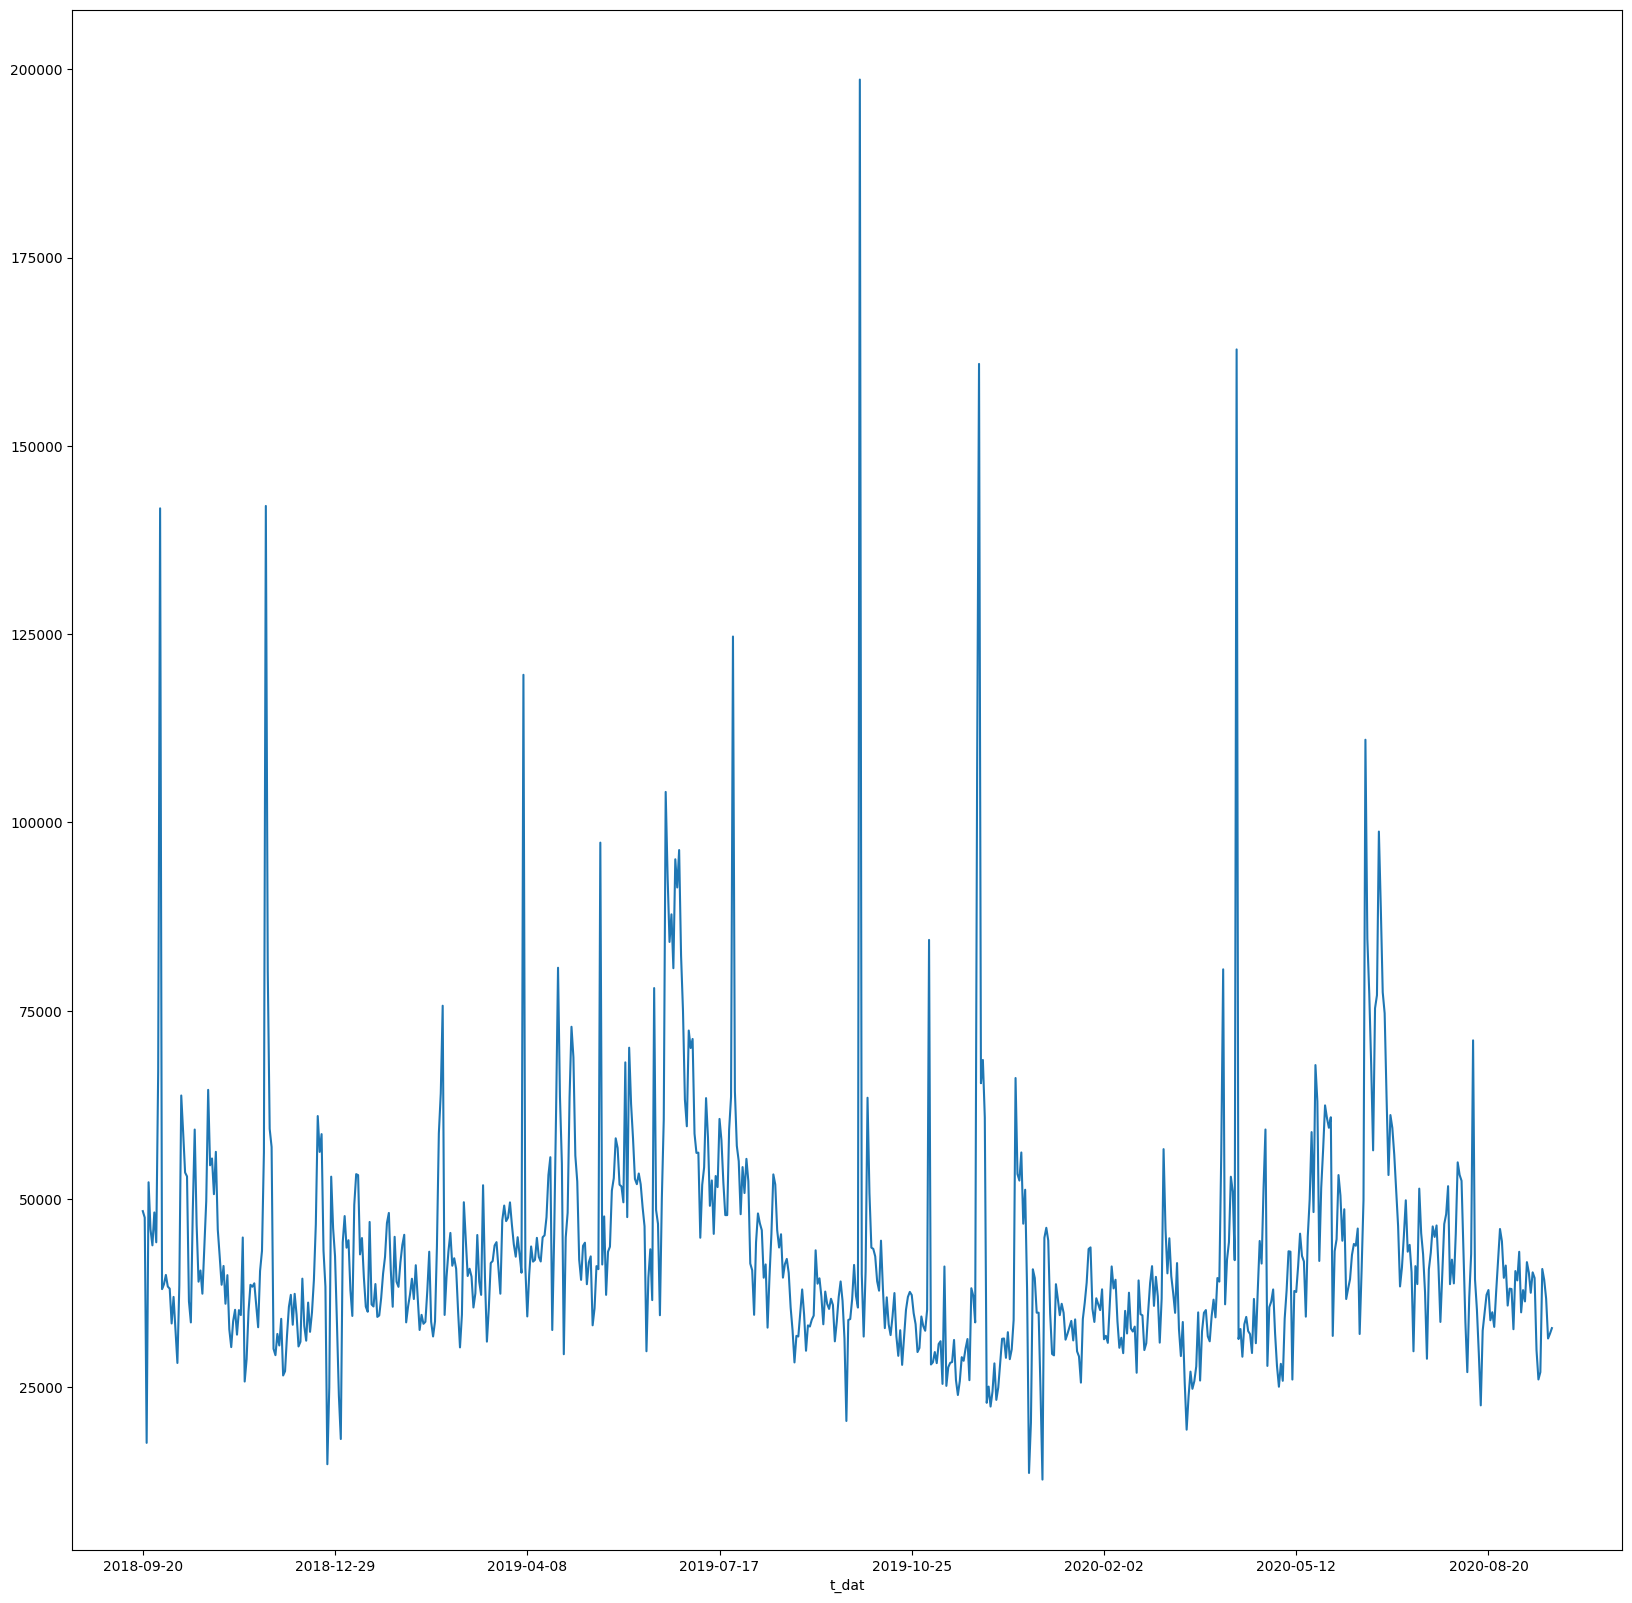

In [31]:
plt.figure(figsize=(20,20))
transactions.groupby('t_dat').size().plot()

In [33]:
transactions['month'] = transactions.apply(lambda x: int(x['t_dat'][5:7]), axis=1)
dct = {1: 0, 2: 0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3, 12:0}
transactions['season'] = transactions.apply(lambda x: dct[x['month']], axis=1)
transactions['year'] = transactions.apply(lambda x: int(x['t_dat'][:4]), axis=1)
transactions.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id,month,season,year
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,9,3,2018
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,9,3,2018
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,9,3,2018
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9,3,2018
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9,3,2018
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,9,3,2018
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,9,3,2018
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1,9,3,2018
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1,9,3,2018
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2,9,3,2018


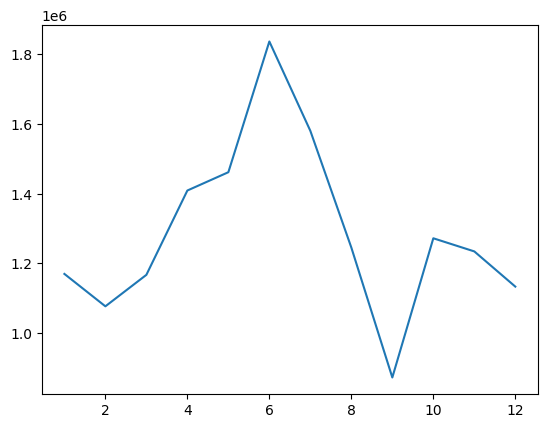

In [34]:
dct = {i: [] for i in range(1, 13)}
for i, j in transactions[['month', 'year']].groupby(['year', 'month']).size().items():
    dct[i[1]].append(j)

dct = {i: sum(j) / len(j) for i, j in dct.items()}

lists = sorted(dct.items())

x, y = zip(*lists)

plt.plot(x, y)
plt.show()

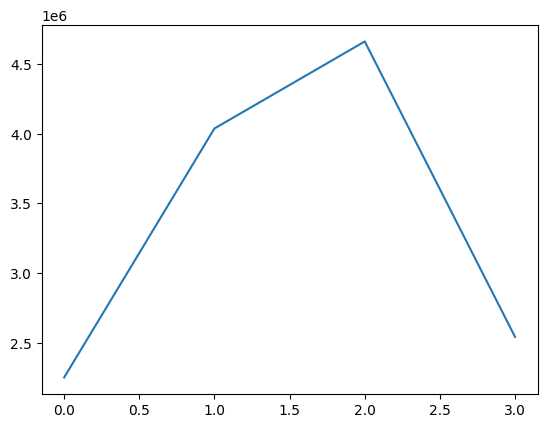

In [35]:
dct = {i: [] for i in range(0, 4)}
for i, j in transactions[['season', 'year']].groupby(['year', 'season']).size().items():
    dct[i[1]].append(j)

dct = {i: sum(j) / len(j) for i, j in dct.items()}

lists = sorted(dct.items())

x, y = zip(*lists)

plt.plot(x, y)
plt.show()

## Создание фич и их анализ

In [36]:
dct = {i:(0, 0) for i in transactions['article_id'].unique()}

for k,v in transactions[['article_id', 'season']].groupby(['article_id', 'season']).size().items():
    if dct[k[0]][1] < v:
        dct[k[0]] = (k[1], v)

dct = {'article_id': [k for k, _ in dct.items()], 'season': [v[0] for _, v in dct.items()]}

df = pd.DataFrame(dct)
items = items.merge(df, on='article_id', how='inner')
items.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,season
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,0
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,3
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",3
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",0


<AxesSubplot: xlabel='season', ylabel='Count'>

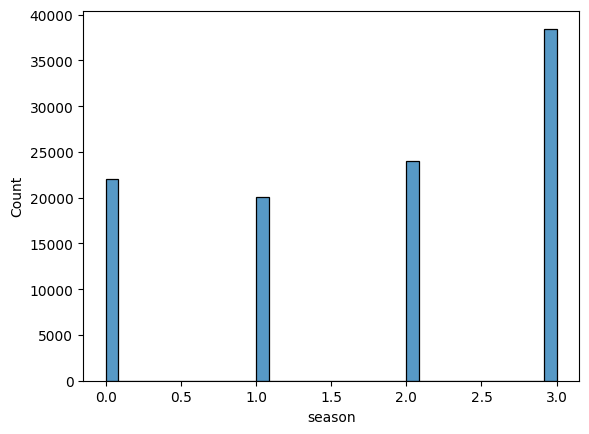

In [37]:
sns.histplot(items.season)

In [38]:
dct = {i: j for i, j in transactions.groupby('article_id').size().items()}

dct = {'article_id': [k for k, _ in dct.items()], 'number_of_purchases': [v for _, v in dct.items()]}

df = pd.DataFrame(dct)
items = items.merge(df, on='article_id', how='inner')
items.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,season,number_of_purchases
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,0,10841
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1,7250
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,3,215
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",3,1044
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",0,539


In [39]:
items.loc[items.number_of_purchases < 10].shape[0] / items.shape[0] * 100

20.304743321185686

In [40]:
dct = {i: j for i, j in transactions.groupby('customer_id').size().items()}

dct = {'customer_id': [k for k, _ in dct.items()], 'number_of_purchases': [v for _, v in dct.items()]}

df = pd.DataFrame(dct)
users = users.merge(df, on='customer_id', how='inner')
users.head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group,number_of_purchases
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,2,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,2,13


In [48]:
users.loc[users.number_of_purchases < 5].shape[0] / users.shape[0] * 100

32.05821706388036

In [42]:
dct = {}
for name in items.index_group_name.unique():
    if 'baby' in name.lower():
        dct[name] = 2
    elif 'ladies' in name.lower():
        dct[name] = 0
    elif 'men' in name.lower():
        dct[name] = 1
    else:
        dct[name] = 3

dct

{'Ladieswear': 0, 'Baby/Children': 2, 'Menswear': 1, 'Sport': 3, 'Divided': 3}

In [43]:
items['sex'] = items.apply(lambda x: dct[x['index_group_name']], axis=1)

In [44]:
items.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,season,number_of_purchases,sex
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,0,10841,0
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,1,7250,0
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,3,215,0
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",3,1044,0
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",0,539,0


In [45]:
df = transactions.merge(items[['article_id', 'sex']], on='article_id', how='inner')
df = df.loc[(df['sex'] == 0) | (df['sex'] == 1)]
d = df[['customer_id', 'sex']].groupby(['customer_id']).mean()
for k, v in d.items():
    a = list(zip(v.iteritems()))
dct = {obj[0][0]:0 if obj[0][1] < 0.5 else 1 for obj in a}
users['sex'] = users.apply(lambda x: dct[x['customer_id']] if x['customer_id'] in dct else None, axis=1)
users.head()

/var/folders/kt/djps_cgs2dbdjb8178k9bkgh0000gn/T/ipykernel_12746/1711519251.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  a = list(zip(v.iteritems()))


,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group,number_of_purchases,sex
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2,21,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,86,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,18,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,2,2,NaN
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,2,13,0.0


In [49]:
users.sex = users.sex.fillna(0.5)

<AxesSubplot: xlabel='sex', ylabel='Count'>

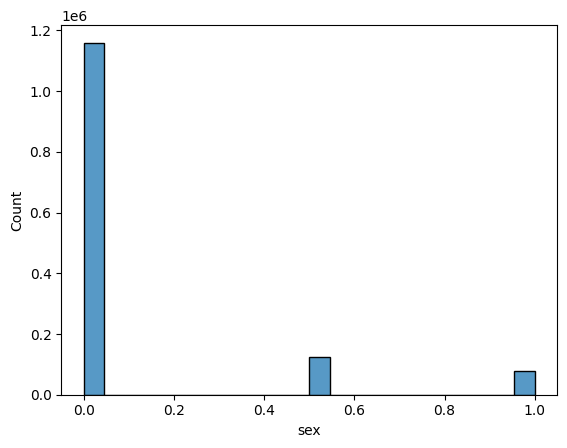

In [50]:
sns.histplot(users.sex)

In [57]:
df = transactions.merge(items[['article_id', 'sex']], on='article_id', how='inner')
df = df.loc[df['sex'] == 2]
dct = {i: 0 for i in users.customer_id.unique()}
for i in df.customer_id.unique():
    dct[i] = 1
users['baby'] = users.customer_id.apply(lambda x: dct[x])

<AxesSubplot: xlabel='baby', ylabel='Count'>

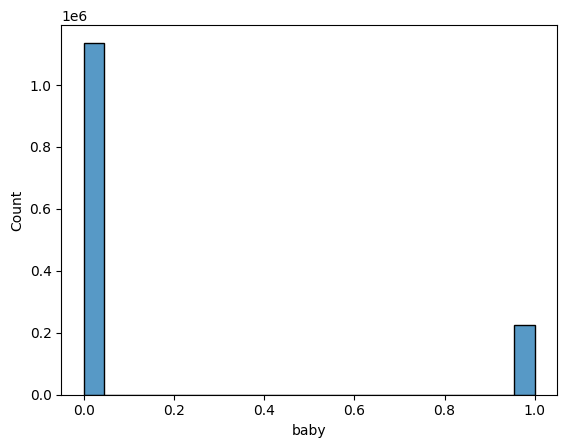

In [59]:
sns.histplot(users.baby)

In [60]:
users.to_csv('../../data/processed_data/customers.csv', index=False)
items.to_csv('../../data/processed_data/articles.csv', index=False)
transactions.to_csv('../../data/processed_data/transactions.csv', index=False)